# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = df.reset_index()


pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [13]:
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [14]:
df.dropna(subset = ['TOTAL_REVENUE'], inplace=True)
df.dropna(subset = ['STATE_REVENUE'], inplace=True)
df.isna().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                           51
TOTAL_REVENUE                     0
FEDERAL_REVENUE                   0
STATE_REVENUE                     0
LOCAL_REVENUE                     0
TOTAL_EXPENDITURE                 0
INSTRUCTION_EXPENDITURE           0
SUPPORT_SERVICES_EXPENDITURE      0
OTHER_EXPENDITURE                51
CAPITAL_OUTLAY_EXPENDITURE        0
GRADES_PK_G                      13
GRADES_KG_G                       0
GRADES_4_G                        0
GRADES_8_G                        0
GRADES_12_G                       0
GRADES_1_8_G                    255
GRADES_9_12_G                   255
GRADES_ALL_G                      0
AVG_MATH_4_SCORE                835
AVG_MATH_8_SCORE                836
AVG_READING_4_SCORE             752
AVG_READING_8_SCORE             839
dtype: int64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: % of Total Revenue Derived from State Revenue

How many years of data are logged in our dataset? 

In [15]:
df["YEAR"].nunique()

25

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [16]:
df["PERCENT_OF_STATE_REVENUE_OF_TOTAL_REVENUE"] = df["STATE_REVENUE"]/df["TOTAL_REVENUE"] * 100
df.dropna(subset = ["PERCENT_OF_STATE_REVENUE_OF_TOTAL_REVENUE"], inplace=True)

states = df.groupby("STATE")

if states.get_group("OHIO")["PERCENT_OF_STATE_REVENUE_OF_TOTAL_REVENUE"].mean() > states.get_group("MICHIGAN")["PERCENT_OF_STATE_REVENUE_OF_TOTAL_REVENUE"].mean():
    print("OHIO")
else:
    print("MICHIGAN")

MICHIGAN


Find the average for your outcome score across all states in 2019

In [23]:

year = df.groupby("YEAR")
year.groups.keys()
year.get_group(2016)["PERCENT_OF_STATE_REVENUE_OF_TOTAL_REVENUE"].mean()
#To make my program work in a later exercise, I dropped 2019 from my dataset, so I did 2016 instead

49.40327084978804

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [25]:
states = df.groupby("STATE")

for i in states:
    print(i[0], states.get_group(i[0])["PERCENT_OF_STATE_REVENUE_OF_TOTAL_REVENUE"].max())

ALABAMA 64.1843039676763
ALASKA 69.37914115302162
ARIZONA 48.187527122103276
ARKANSAS 77.15618716564565
CALIFORNIA 63.010275123500456
COLORADO 45.13257624635726
CONNECTICUT 39.22171109359534
DELAWARE 65.9131111911763
DISTRICT_OF_COLUMBIA 0.0
FLORIDA 51.014840195738195
GEORGIA 54.215241412094926
HAWAII 90.63351153530917
IDAHO 66.88228283079157
ILLINOIS 36.94747194987966
INDIANA 61.6248323876611
IOWA 51.78330674413688
KANSAS 66.22141414559499
KENTUCKY 64.22641515773064
LOUISIANA 55.330560122205654
MAINE 47.669496635833035
MARYLAND 44.24614004432956
MASSACHUSETTS 45.01305093769844
MICHIGAN 65.03715777954025
MINNESOTA 71.47711879678901
MISSISSIPPI 57.34526073571051
MISSOURI 48.56785439774968
MONTANA 54.73379541473074
NEBRASKA 36.42794371331547
NEVADA 65.99652166303885
NEW_HAMPSHIRE 54.529895032293155
NEW_JERSEY 46.01061389979529
NEW_MEXICO 74.48009196363256
NEW_YORK 48.49965297517526
NORTH_CAROLINA 65.57116221402075
NORTH_DAKOTA 57.427260855183285
OHIO 44.8925482665348
OKLAHOMA 61.35573631

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [ ]:
I already made my feature, which was the percent of the total revenue that was state revenue.

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Math Scores')

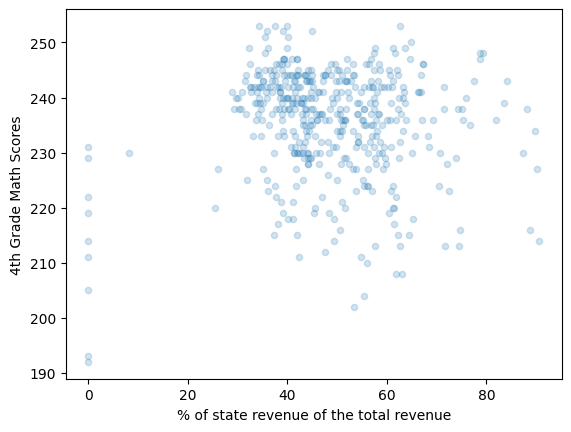

In [27]:
df.plot.scatter(x = "PERCENT_OF_STATE_REVENUE_OF_TOTAL_REVENUE", y = "AVG_MATH_4_SCORE", alpha = 0.2)
plt.xlabel("% of state revenue of the total revenue")
plt.ylabel("4th Grade Math Scores")

% of state revenue of the total revenue vs. 4th Grade Math Scores

**Visualization 2**

Text(0, 0.5, '8th Grade Math Scores')

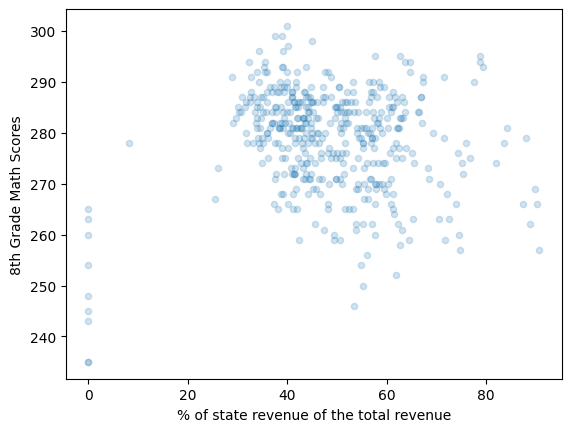

In [28]:
df.plot.scatter(x = "PERCENT_OF_STATE_REVENUE_OF_TOTAL_REVENUE", y = "AVG_MATH_8_SCORE", alpha = 0.2)
plt.xlabel("% of state revenue of the total revenue")
plt.ylabel("8th Grade Math Scores")

% of state revenue of the total revenue vs. 8th Grade Math Scores

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = df[["AVG_MATH_4_SCORE", "AVG_MATH_8_SCORE"]].dropna()
y = df.loc[X.index]["PERCENT_OF_STATE_REVENUE_OF_TOTAL_REVENUE"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [47]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [48]:
# create your model here
model = LinearRegression()

In [49]:
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

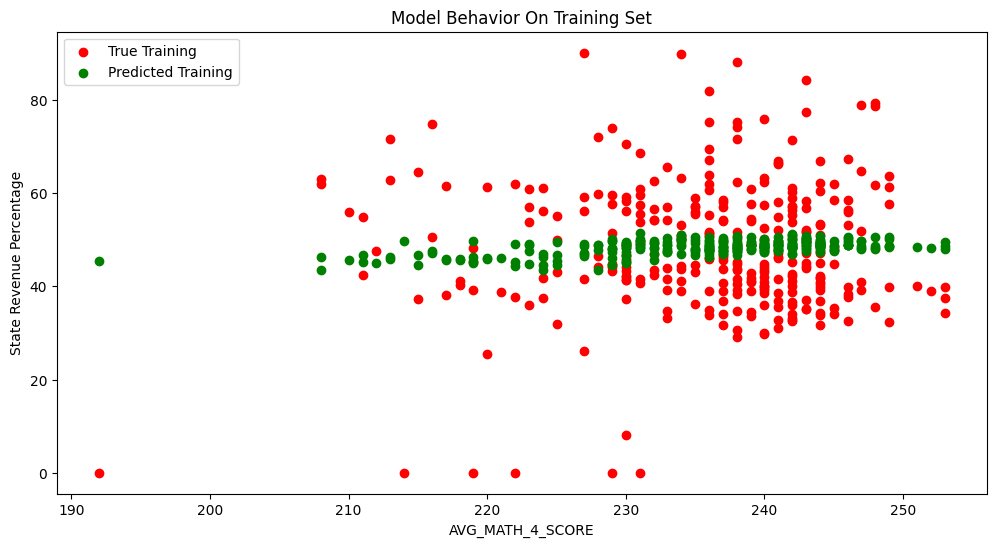

In [53]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('State Revenue Percentage')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

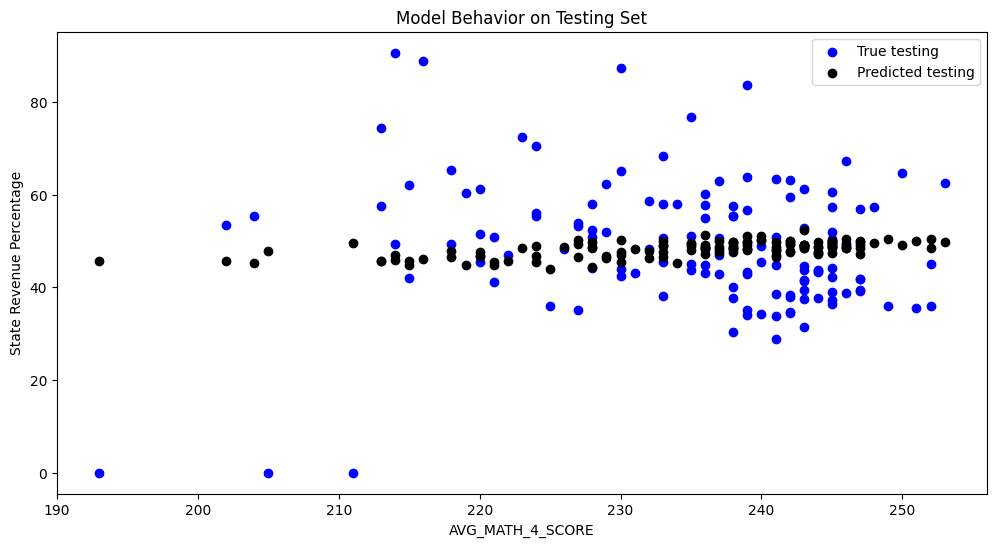

In [55]:
col_name = "AVG_MATH_4_SCORE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('State Revenue Percentage')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

    I tried to determine whether or not the percentage of total revenue that is state revenue could be predicted based on 4th and 8th grade standardized math tests. I chose these predictors since better scores on standardized test might've correlated with higher state revenue and therefore higher funding of public schools. However, based on the linear regression model I created, the predicted values are very far from the true values, indicating the performance of the model is very low. In conclusion, I should've chosen better variables with a more obvious correlation. 